In [1]:
%matplotlib inline


### Supervised Learning : Naive Bayes Classifier 

Welcome to the "Supervised Learning : Naive Bayes Classifier" practical session.  

Programming Language : Python 
Editor : Jupyter Notebook. 

Pandas : Data loading, processing, transformation and manipulation.
Scikit-learn : Example data source, ML and statistical analysis


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


#### Load relevant data and partition the data for train and test
Here we will use the same breast cancer data set.
After loading the data we will partition the data into train and test. 
In this example we will 80% data for training and remaining 20% will be left for testing. 

In [2]:
## We Load the complete data for new infection  ##


df = pd.read_csv('Covid_19_train.csv', sep = ",", header=None )
df.columns = ["date", "new_infections"]
df

,date,new_infections
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
72,2020-04-03,119827.0
73,2020-04-04,124632.0
74,2020-04-05,128948.0
75,2020-04-06,132547.0


In [14]:

## Preprocess data
data = df['new_infections'].values
data = data.reshape(-1, 1)


In [33]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Splitting full data set into train and test sets
training_data_len = int(np.ceil( len(scaled_data) * .95 ))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[int(training_data_len)-7: , :]

# Create sequences
def create_sequences(data):
    X, y = [], []
    for i in range(7, len(data)):
        X.append(data[i-7:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Reshape the input into the shape required by LSTM layers
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2023-06-20 22:58:48.379102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 22:58:48.380555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 22:58:48.382224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 3s 10ms/step - loss: 0.0978
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0602
Epoch 3/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0356
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0264
Epoch 5/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0204
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0099
Epoch 7/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0027
Epoch 8/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0028
Epoch 9/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0054
Epoch 10/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0066
Epoch 11/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0041
Epoch 12/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0019
Epoch 13/50
3/3 [==============================] - 0s 15ms/step - loss: 

In [36]:
# Predicting on test data
predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)

print(scaler)

1/1 [==============================] - 0s 22ms/step
MinMaxScaler()


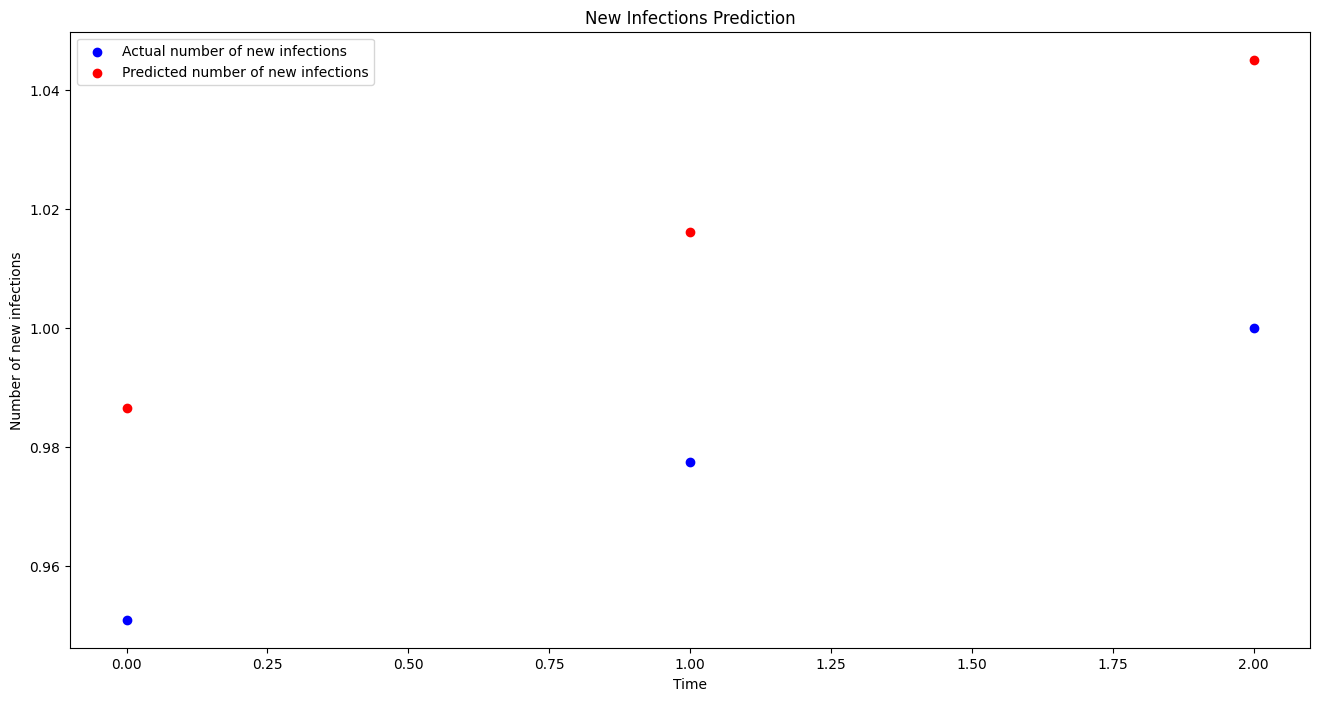

In [35]:
# Getting the real values
real_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(16,8))
plt.scatter(range(len(real_values)), real_values, color='blue', label='Actual number of new infections')
plt.scatter(range(len(predicted_values)), predicted_values, color='red', label='Predicted number of new infections')
plt.title('New Infections Prediction')
plt.xlabel('Time')
plt.ylabel('Number of new infections')
plt.legend()
plt.show()

### Your Task

- For this practical you will use the Indian Liver Patient Dataset (lipid ) data set. 

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. The class label divides the patients into 2 groups (liver patient or not). This data set contains 441 male patient records and 142 female patient records.


1. Load the whole Covid 19 infection count data set.
2. Subset the data where Country_Region = "China". Only take the data "Date" and  "ConfirmedCases" 
3. Split the data into train and test by leaving 10% data for test. 
4. Train a RNN classifier using the train data.
5. Apply the trained model on the test data.
6. Plot the predicted vs real infection values for the test data set. 

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

## Task 1. Load the whole Covid 19 infection count data set.
## Task 2. Subset the for China  

df = pd.read_csv('covid_19_complete_dataset.csv')

df_china = df.loc[ df["Country_Region"] == "China", ["Date", "ConfirmedCases"] ]
df_china.columns = ["date", "new_infections"]
df_china

,date,new_infections
4158,2020-01-22,1.0
4159,2020-01-23,9.0
4160,2020-01-24,15.0
4161,2020-01-25,39.0
4162,2020-01-26,60.0
...,...,...
6694,2020-04-03,1260.0
6695,2020-04-04,1262.0
6696,2020-04-05,1263.0
6697,2020-04-06,1264.0


In [42]:
## Task 3. Split the data into train and test by leaving 10% data for test. 

# Preprocess data
data = df_china['new_infections'].values
data = data.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Splitting full data set into train and test sets
training_data_len = int(np.ceil( len(scaled_data) * .90 ))


In [43]:
## Task 4. Train a RNN classifier using the train data.

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[int(training_data_len)-7: , :]

# Create sequences
def create_sequences(data):
    X, y = [], []
    for i in range(7, len(data)):
        X.append(data[i-7:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Reshape the input into the shape required by LSTM layers
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)



Epoch 1/50


2023-06-20 23:25:49.179753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 23:25:49.180904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 23:25:49.182191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

72/72 [==============================] - 3s 9ms/step - loss: 0.0049
Epoch 2/50
72/72 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 3/50
72/72 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 4/50
72/72 [==============================] - 1s 8ms/step - loss: 0.0018
Epoch 5/50
72/72 [==============================] - 1s 9ms/step - loss: 0.0031
Epoch 6/50
72/72 [==============================] - 1s 8ms/step - loss: 0.0015
Epoch 7/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 8/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0013
Epoch 9/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 10/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0013
Epoch 11/50
72/72 [==============================] - 1s 10ms/step - loss: 0.0013
Epoch 12/50
72/72 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 13/50
72/72 [==============================] - 1s

2023-06-20 23:26:41.259544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 23:26:41.260792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 23:26:41.261553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 0s 5ms/step


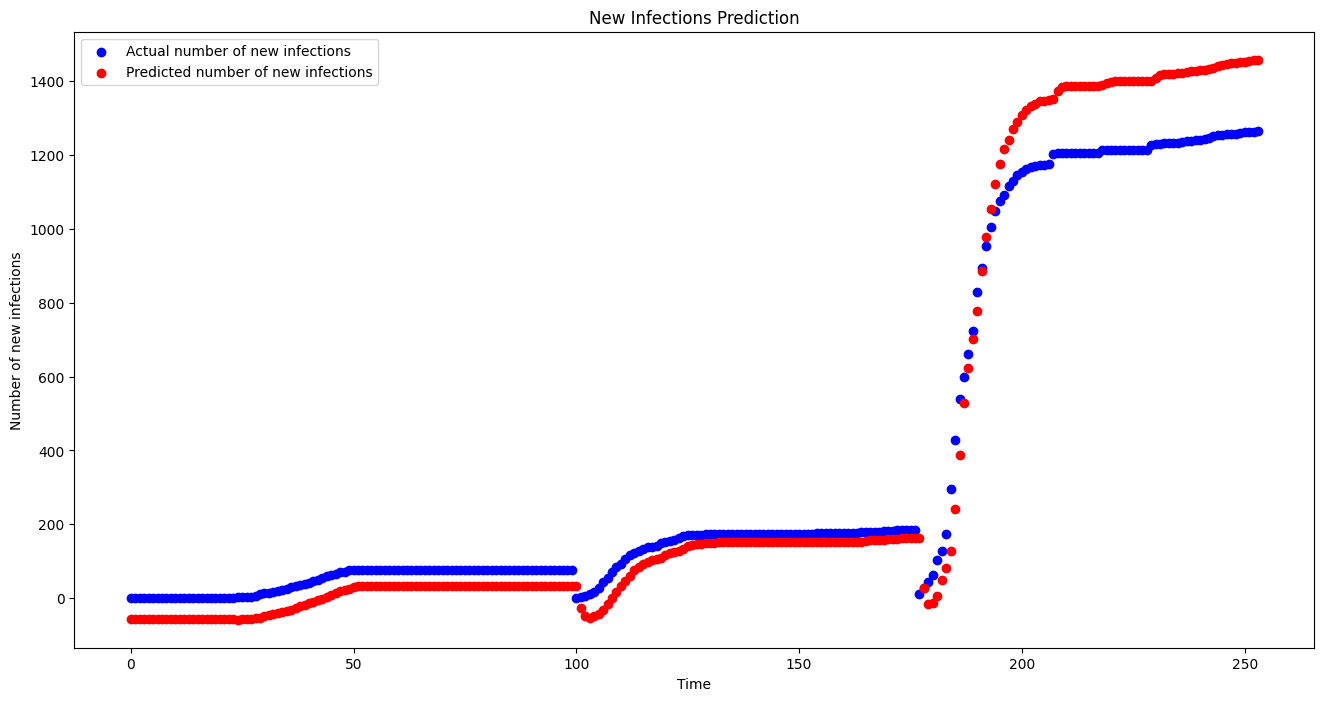

In [44]:
## Task 5. Apply the trained model on the test data.
## Task 6. Plot the predicted vs real infection values for the test data set. 

# Predicting on test data
predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)

# Getting the real values
real_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(16,8))
plt.scatter(range(len(real_values)), real_values, color='blue', label='Actual number of new infections')
plt.scatter(range(len(predicted_values)), predicted_values, color='red', label='Predicted number of new infections')
plt.title('New Infections Prediction')
plt.xlabel('Time')
plt.ylabel('Number of new infections')
plt.legend()
plt.show()
